In [60]:
import numpy as np
np.random.seed(1) # for reproducibility

import keras.backend as K
import tensorflow as tf
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import time
import os
import pickle
import numpy as np
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
# from tensorflow.keras import optimizers
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

In [6]:
import statsmodels.api as sm

data = sm.datasets.co2.load_pandas().data
data.dropna(inplace=True)
print(data.head())
# CO2 Emissions Dataset: Daily CO2 measurements from Mauna Loa Observatory.
# Or get 'macrodata' for macroeconomic time series data
# data_macro = sm.datasets.macrodata.load_pandas().data
# print(data_macro.head())

              co2
1958-03-29  316.1
1958-04-05  317.3
1958-04-12  317.6
1958-04-19  317.5
1958-04-26  316.4


In [7]:
data.tail()

,co2
2001-12-01,370.3
2001-12-08,370.8
2001-12-15,371.2
2001-12-22,371.3
2001-12-29,371.5


In [8]:
data.shape

(2225, 1)

In [9]:
data.describe()

,co2
count,2225.000000
mean,340.142247
std,17.003885
min,313.000000
25%,324.800000
50%,338.300000
75%,354.800000
max,373.900000


In [10]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)
data_scaled = data_scaled.reshape(data_scaled.shape[0])

In [11]:
data_scaled.shape

(2225,)

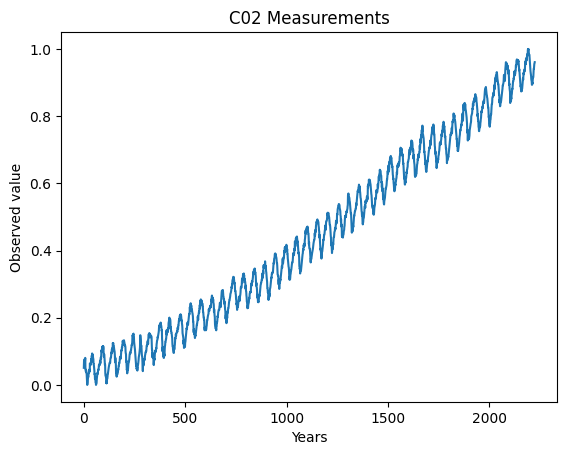

In [12]:
plt.title('C02 Measurements')
plt.xlabel('Years')
plt.ylabel('Observed value')
plt.plot(data_scaled)

In [13]:
def create_data(dataset,window_size = 10):
    # df = dataset.to_numpy()
    df = dataset.copy()
    X = []
    y = []
    for i in range(len(df)-window_size):
        row = [a for a in df[i:i+window_size]]
        X.append(row)
        label = df[i+window_size]
        y.append(label)
        
    return np.array(X),np.array(y)



In [14]:
WINDOW_SIZE = 10

X,y = create_data(data_scaled,WINDOW_SIZE)

In [17]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [37]:
model_mse = Sequential()
model_mse.add(InputLayer(shape = (10,1)))
model_mse.add(LSTM(128))
model_mse.add(Dense(8,'relu'))
model_mse.add(Dense(1,'linear'))

# model_mse.summary()
model_mse.compile(loss='mse',optimizer=Adam(learning_rate=0.001),metrics = [RootMeanSquaredError()])
# history_mse = model_mse.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=10,callbacks=[cp])
history_mse = model_mse.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=50)

Epoch 1/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0839 - root_mean_squared_error: 0.2735 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0352
Epoch 2/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.4711e-04 - root_mean_squared_error: 0.0272 - val_loss: 5.8014e-04 - val_root_mean_squared_error: 0.0241
Epoch 3/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.1566e-04 - root_mean_squared_error: 0.0248 - val_loss: 5.8932e-04 - val_root_mean_squared_error: 0.0243
Epoch 4/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.7672e-04 - root_mean_squared_error: 0.0240 - val_loss: 5.5433e-04 - val_root_mean_squared_error: 0.0235
Epoch 5/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.4835e-04 - root_mean_squared_error: 0.0234 - val_loss: 5.1329e-04 - val_root_mean_squared_error: 0.0227
Epoch 6/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.3473e-04 - root_mean_squared_error: 0.0231 - val_loss: 4.8764e-04 - val_root_mean_squared_error: 0.0221
Epoch 7/50
56/56 ━━━━━━

In [38]:
model_mae = Sequential()
model_mae.add(InputLayer(shape = (10,1)))
model_mae.add(LSTM(128))
model_mae.add(Dense(8,'relu'))
model_mae.add(Dense(1,'linear'))

# model_mae.summary()
# cp = model_maeCheckpoint('output/best_model.weights.h5',save_weights_only=False)
# cp = model_maeCheckpoint('output/best_model.keras',save_weights_only=False)
model_mae.compile(loss='mse',optimizer=Adam(learning_rate=0.001),metrics = [RootMeanSquaredError()])
history_mae = model_mae.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=50)

Epoch 1/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0589 - root_mean_squared_error: 0.2261 - val_loss: 7.7040e-04 - val_root_mean_squared_error: 0.0278
Epoch 2/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.8076e-04 - root_mean_squared_error: 0.0241 - val_loss: 5.1327e-04 - val_root_mean_squared_error: 0.0227
Epoch 3/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.4440e-04 - root_mean_squared_error: 0.0233 - val_loss: 5.6595e-04 - val_root_mean_squared_error: 0.0238
Epoch 4/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.3032e-04 - root_mean_squared_error: 0.0230 - val_loss: 4.9934e-04 - val_root_mean_squared_error: 0.0223
Epoch 5/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.9788e-04 - root_mean_squared_error: 0.0223 - val_loss: 4.8821e-04 - val_root_mean_squared_error: 0.0221
Epoch 6/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.5673e-04 - root_mean_squared_error: 0.0214 - val_loss: 4.7590e-04 - val_root_mean_squared_error: 0.0218
Epoch 7/50
56/56 ━━

In [39]:
import tensorflow as tf
import keras.backend as K
def custom_loss(y_true, y_pred):
    # Extract "next day's price" and "today's price"
    y_true_next = y_true[1:]
    y_pred_next = y_pred[1:]
    
    y_true_tdy = y_true[:-1]
    y_pred_tdy = y_pred[:-1]
    
    y_true_diff = tf.subtract(y_true_next, y_true_tdy)
    y_pred_diff = tf.subtract(y_pred_next, y_pred_tdy)
    
    y_true_move = tf.cast(tf.greater_equal(y_true_diff, 0), tf.float32)
    y_pred_move = tf.cast(tf.greater_equal(y_pred_diff, 0), tf.float32)
    
    direction_mismatch = tf.not_equal(y_true_move, y_pred_move)
    
    penalty_factor = tf.reduce_mean(tf.abs(y_true_diff)) 
    penalty = tf.where(direction_mismatch, 
                       (tf.abs(y_true_diff - y_pred_diff) * penalty_factor), 
                       tf.zeros_like(y_true_diff))   
    # Mean squared error loss
    # mse_loss = K.mean(K.square(y_true - y_pred), axis=-1)
    mse_loss = tf.reduce_mean(tf.square(y_true - y_pred), axis=-1)
    
    custom_loss = mse_loss + penalty
    
    return custom_loss


In [54]:
model_custom = Sequential()
model_custom.add(InputLayer(shape = (10,1)))
model_custom.add(LSTM(128))
model_custom.add(Dense(8,'relu'))
model_custom.add(Dense(1,'linear'))

model_custom.compile(loss=custom_loss,optimizer=Adam(learning_rate=0.001),metrics = [RootMeanSquaredError()])
# model_custom.compile(loss=custom_loss,optimizer=Adam(learning_rate=0.0001),metrics = ['accuracy'])

history_custom = model_custom.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=50)

Epoch 1/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0689 - root_mean_squared_error: 0.2464 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0299
Epoch 2/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 9.2186e-04 - root_mean_squared_error: 0.0252 - val_loss: 7.8687e-04 - val_root_mean_squared_error: 0.0234
Epoch 3/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 8.1387e-04 - root_mean_squared_error: 0.0227 - val_loss: 7.4332e-04 - val_root_mean_squared_error: 0.0226
Epoch 4/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 7.8668e-04 - root_mean_squared_error: 0.0224 - val_loss: 6.9233e-04 - val_root_mean_squared_error: 0.0215
Epoch 5/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 7.5968e-04 - root_mean_squared_error: 0.0216 - val_loss: 6.5841e-04 - val_root_mean_squared_error: 0.0209
Epoch 6/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 7.2457e-04 - root_mean_squared_error: 0.0211 - val_loss: 7.6278e-04 - val_root_mean_squared_error: 0.0237
Epoch 7/50
56/56 ━

In [40]:
model_huber = Sequential()
model_huber.add(InputLayer(shape = (10,1)))
model_huber.add(LSTM(128))
model_huber.add(Dense(8,'relu'))
model_huber.add(Dense(1,'linear'))

model_huber.compile(loss='Huber',optimizer=Adam(learning_rate=0.001),metrics = [RootMeanSquaredError()])
# model_huber.compile(loss=huber_loss,optimizer=Adam(learning_rate=0.0001),metrics = ['accuracy'])

history_huber = model_huber.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=50)

Epoch 1/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0364 - root_mean_squared_error: 0.2522 - val_loss: 2.7324e-04 - val_root_mean_squared_error: 0.0234
Epoch 2/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.7875e-04 - root_mean_squared_error: 0.0236 - val_loss: 2.4370e-04 - val_root_mean_squared_error: 0.0221
Epoch 3/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.5139e-04 - root_mean_squared_error: 0.0224 - val_loss: 2.4696e-04 - val_root_mean_squared_error: 0.0222
Epoch 4/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.4989e-04 - root_mean_squared_error: 0.0224 - val_loss: 2.2839e-04 - val_root_mean_squared_error: 0.0214
Epoch 5/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.2695e-04 - root_mean_squared_error: 0.0213 - val_loss: 2.1713e-04 - val_root_mean_squared_error: 0.0208
Epoch 6/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.1043e-04 - root_mean_squared_error: 0.0205 - val_loss: 2.0028e-04 - val_root_mean_squared_error: 0.0200
Epoch 7/50
56/56 ━━━

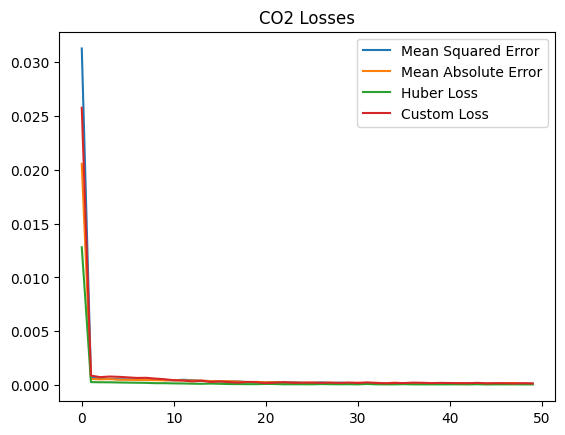

In [55]:
plt.plot(history_mse.history['loss'],label = 'Mean Squared Error')
plt.plot(history_mae.history['loss'],label = 'Mean Absolute Error')
plt.plot(history_huber.history['loss'],label = 'Huber Loss')
plt.plot(history_custom.history['loss'],label = 'Custom Loss')
plt.title('CO2 Losses')
plt.legend()
plt.show()

In [56]:
train_predictions_mse = model_mse.predict(X_train).flatten()
train_predictions_mae = model_mae.predict(X_train).flatten()
train_predictions_custom = model_custom.predict(X_train).flatten()
train_predictions_huber = model_huber.predict(X_train).flatten()

test_predictions_mse= model_mse.predict(X_test).flatten()
test_predictions_mae= model_mae.predict(X_test).flatten()
test_predictions_custom= model_custom.predict(X_test).flatten()
test_predictions_huber = model_huber.predict(X_test).flatten()

 1/56 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step

56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [57]:
huber_loss = tf.keras.losses.Huber(delta=1.0)  # delta is the threshold for transition between quadratic and linear loss

print("MAE for MAE model " ,mean_absolute_error(Y_train,train_predictions_mae))
print("MAE for MSE model " ,mean_absolute_error(Y_train,train_predictions_mse))
print("MAE for Huber model " ,mean_absolute_error(Y_train,train_predictions_huber))
print("MAE for Custom model " ,mean_absolute_error(Y_train,train_predictions_custom))
print()

print("MSE for MAE model " ,mean_squared_error(Y_train,train_predictions_mae))
print("MSE for MSE model " ,mean_squared_error(Y_train,train_predictions_mse))
print("MSE for Huber model " ,mean_squared_error(Y_train,train_predictions_huber))
print("MSE for Custom model " ,mean_squared_error(Y_train,train_predictions_custom))
print()

print("Huber loss for MAE model " ,huber_loss(Y_train,train_predictions_mae))
print("Huber loss for MSE model " ,huber_loss(Y_train,train_predictions_mse))
print("Huber loss for Huber model " ,huber_loss(Y_train,train_predictions_huber))
print("Huber loss for Custom model " ,huber_loss(Y_train,train_predictions_custom))

MAE for MAE model  0.009602155817643418
MAE for MSE model  0.007823674626895885
MAE for Huber model  0.006788889357527232
MAE for Custom model  0.008125824172468498

MSE for MAE model  0.0001457740860782072
MSE for MSE model  9.602632585567814e-05
MSE for Huber model  7.331779460589122e-05
MSE for Custom model  0.00010814679004660002

Huber loss for MAE model  tf.Tensor(7.2887044e-05, shape=(), dtype=float32)
Huber loss for MSE model  tf.Tensor(4.801316e-05, shape=(), dtype=float32)
Huber loss for Huber model  tf.Tensor(3.6658897e-05, shape=(), dtype=float32)
Huber loss for Custom model  tf.Tensor(5.4073396e-05, shape=(), dtype=float32)


In [58]:
print("MAE model " ,mean_absolute_error(Y_test,test_predictions_mae))
print("MSE model " ,mean_absolute_error(Y_test,test_predictions_mse))
print("Huber model " ,mean_absolute_error(Y_test,test_predictions_huber))
print("Custom model " ,mean_absolute_error(Y_test,test_predictions_custom))
print()

print("MAE model " ,mean_squared_error(Y_test,test_predictions_mae))
print("MSE model " ,mean_squared_error(Y_test,test_predictions_mse))
print("Huber model " ,mean_squared_error(Y_test,test_predictions_huber))
print("Custom model " ,mean_squared_error(Y_test,test_predictions_custom))
print()

huber_loss = tf.keras.losses.Huber(delta=1.0)  # delta is the threshold for transition between quadratic and linear loss
print("MAE model " ,huber_loss(Y_test,test_predictions_mae))
print("MSE model " ,huber_loss(Y_test,test_predictions_mse))
print("Huber model " ,huber_loss(Y_test,test_predictions_huber))
print("Custom model " ,huber_loss(Y_test,test_predictions_custom))

MAE model  0.010060035606076864
MSE model  0.00798339939296771
Huber model  0.00694402408380213
Custom model  0.008501062115331963

MAE model  0.0001518579158878265
MSE model  9.449353935120698e-05
Huber model  7.19626205775333e-05
Custom model  0.00011177667076724091

MAE model  tf.Tensor(7.592897e-05, shape=(), dtype=float32)
MSE model  tf.Tensor(4.7246773e-05, shape=(), dtype=float32)
Huber model  tf.Tensor(3.5981313e-05, shape=(), dtype=float32)
Custom model  tf.Tensor(5.588834e-05, shape=(), dtype=float32)


In [61]:
print("MAE model " ,r2_score(Y_test,test_predictions_mae))
print("MSE model " ,r2_score(Y_test,test_predictions_mse))
print("Huber model " ,r2_score(Y_test,test_predictions_huber))
print("Custom model " ,r2_score(Y_test,test_predictions_custom))

MAE model  0.9981139651734842
MSE model  0.9988264154354076
Huber model  0.9991062434393158
Custom model  0.9986117635513005


In [62]:
print("MAE model " ,r2_score(Y_train,train_predictions_mae))
print("MSE model " ,r2_score(Y_train,train_predictions_mse))
print("Huber model " ,r2_score(Y_train,train_predictions_huber))
print("Custom model " ,r2_score(Y_train,train_predictions_custom))

MAE model  0.9981039390288641
MSE model  0.9987510004449017
Huber model  0.9990463667954851
Custom model  0.9985933514434727
